Found existing installation: tensorflow 2.16.1
Uninstalling tensorflow-2.16.1:
  Would remove:
    /Users/saee2510/anaconda3/bin/import_pb_to_tensorboard
    /Users/saee2510/anaconda3/bin/saved_model_cli
    /Users/saee2510/anaconda3/bin/tensorboard
    /Users/saee2510/anaconda3/bin/tf_upgrade_v2
    /Users/saee2510/anaconda3/bin/tflite_convert
    /Users/saee2510/anaconda3/bin/toco
    /Users/saee2510/anaconda3/bin/toco_from_protos
    /Users/saee2510/anaconda3/lib/python3.11/site-packages/tensorflow-2.16.1.dist-info/*
    /Users/saee2510/anaconda3/lib/python3.11/site-packages/tensorflow/*
Proceed (Y/n)? ^C
ERROR: Operation cancelled by user
Note: you may need to restart the kernel to use updated packages.


In [3]:
from tensorflow.keras.utils import to_categorical


In [2]:
import os
from os import listdir
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import plotly.express as px
import seaborn as sns

import cv2
from matplotlib.image import imread

import tensorflow as tf

from tensorflow.keras.preprocessing import image
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


import glob
import PIL
import random

random.seed(100)

In [4]:
dicom_data = pd.read_csv("dicom_info.csv")
image_dir = '/Users/saee2510/Downloads/breast-cancer-dataset/jpeg'

In [5]:
dicom_data.head()

file_path  \
0  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.12930...   
1  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.24838...   
2  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.26721...   
3  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...   
4  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...   

                                          image_path  AccessionNumber  \
0  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.129308...              NaN   
1  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.248386...              NaN   
2  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.267213...              NaN   
3  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...              NaN   
4  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...              NaN   

   BitsAllocated  BitsStored BodyPartExamined  Columns  ContentDate  \
0             16          16           BREAST      351     20160426   
1             16          16           BREAST     3526     20160426   
2             16          16           BREAST     1546     20160503   
3             16          16           BREAST       97     20160503   
4              8           8      Left Breast     3104     20160503   

   ContentTime ConversionType  ...  \
0   131732.685            WSD  ...   
1   143829.101            WSD  ...   
2   111956.298            WSD  ...   
3   115347.770            WSD  ...   
4   115347.770            WSD  ...   

   SecondaryCaptureDeviceManufacturerModelName      SeriesDescription  \
0                                       MATLAB         cropped images   
1                                       MATLAB  full mammogram images   
2                                       MATLAB  full mammogram images   
3                                       MATLAB         cropped images   
4                                       MATLAB                    NaN   

                                   SeriesInstanceUID SeriesNumber  \
0  1.3.6.1.4.1.9590.100.1.2.129308726812851964007...            1   
1  1.3.6.1.4.1.9590.100.1.2.248386742010678582309...            1   
2  1.3.6.1.4.1.9590.100.1.2.267213171011171858918...            1   
3  1.3.6.1.4.1.9590.100.1.2.381187369611524586537...            1   
4  1.3.6.1.4.1.9590.100.1.2.381187369611524586537...            1   

  SmallestImagePixelValue  SpecificCharacterSet   StudyDate StudyID  \
0                   23078            ISO_IR 100  20160720.0    DDSM   
1                       0            ISO_IR 100  20160720.0    DDSM   
2                       0            ISO_IR 100  20160807.0    DDSM   
3                   32298            ISO_IR 100  20170829.0    DDSM   
4                       0            ISO_IR 100         NaN    DDSM   

                                    StudyInstanceUID  StudyTime  
0  1.3.6.1.4.1.9590.100.1.2.271867287611061855725...   214951.0  
1  1.3.6.1.4.1.9590.100.1.2.161516517311681906612...   193426.0  
2  1.3.6.1.4.1.9590.100.1.2.291043622711253836701...   161814.0  
3  1.3.6.1.4.1.9590.100.1.2.335006093711888937440...   180109.0  
4  1.3.6.1.4.1.9590.100.1.2.335006093711888937440...        NaN  

[5 rows x 38 columns]

In [6]:
dicom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10237 entries, 0 to 10236
Data columns (total 38 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   file_path                                    10237 non-null  object 
 1   image_path                                   10237 non-null  object 
 2   AccessionNumber                              0 non-null      float64
 3   BitsAllocated                                10237 non-null  int64  
 4   BitsStored                                   10237 non-null  int64  
 5   BodyPartExamined                             10237 non-null  object 
 6   Columns                                      10237 non-null  int64  
 7   ContentDate                                  10237 non-null  int64  
 8   ContentTime                                  10237 non-null  float64
 9   ConversionType                               10237 non-null  object 
 10

In [7]:
cropped_images = dicom_data[dicom_data.SeriesDescription == 'cropped images'].image_path
cropped_images.head()

0     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.129308...
3     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...
6     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.153339...
7     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.178994...
10    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.411833...
Name: image_path, dtype: object

In [8]:
cropped_images = cropped_images.apply(lambda x:x.replace('CBIS-DDSM/jpeg',image_dir))
cropped_images.head()

0     /Users/saee2510/Downloads/breast-cancer-datase...
3     /Users/saee2510/Downloads/breast-cancer-datase...
6     /Users/saee2510/Downloads/breast-cancer-datase...
7     /Users/saee2510/Downloads/breast-cancer-datase...
10    /Users/saee2510/Downloads/breast-cancer-datase...
Name: image_path, dtype: object

In [ ]:
conda install pillow

In [9]:
from PIL import Image

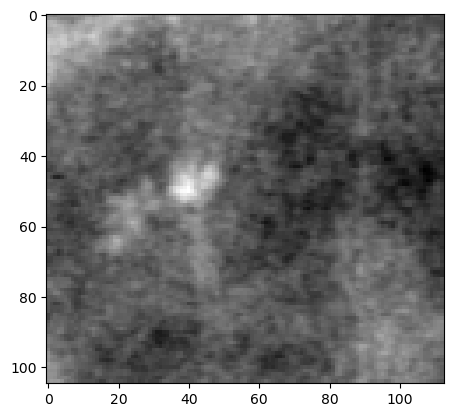

In [10]:
for file in cropped_images[0:10]:
    cropped_images_show = PIL.Image.open(file)
    gray_img= cropped_images_show.convert("L")
    plt.imshow(gray_img, cmap='gray')

In [11]:
full_mammogram_images = dicom_data[dicom_data.SeriesDescription == 'full mammogram images'].image_path
full_mammogram_images.head()

1     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.248386...
2     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.267213...
11    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.210396...
12    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.749566...
15    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.987658...
Name: image_path, dtype: object

In [12]:
full_mammogram_images = full_mammogram_images.apply(lambda x: x.replace('CBIS-DDSM/jpeg', image_dir))
full_mammogram_images.head()

1     /Users/saee2510/Downloads/breast-cancer-datase...
2     /Users/saee2510/Downloads/breast-cancer-datase...
11    /Users/saee2510/Downloads/breast-cancer-datase...
12    /Users/saee2510/Downloads/breast-cancer-datase...
15    /Users/saee2510/Downloads/breast-cancer-datase...
Name: image_path, dtype: object

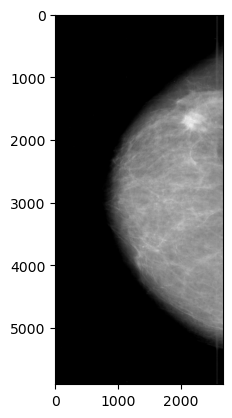

In [13]:
for file in full_mammogram_images[0:10]:
    full_mammogram_images_show = PIL.Image.open(file)
    gray_img= full_mammogram_images_show.convert("L")
    plt.imshow(gray_img, cmap='gray')

In [14]:
ROI_mask_images = dicom_data[dicom_data.SeriesDescription == 'ROI mask images'].image_path
ROI_mask_images.head()

5     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.153339...
8     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.178994...
9     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.411833...
14    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.236373...
20    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.357008...
Name: image_path, dtype: object

In [15]:
ROI_mask_images = ROI_mask_images.apply(lambda x: x.replace('CBIS-DDSM/jpeg', image_dir))
ROI_mask_images.head()

5     /Users/saee2510/Downloads/breast-cancer-datase...
8     /Users/saee2510/Downloads/breast-cancer-datase...
9     /Users/saee2510/Downloads/breast-cancer-datase...
14    /Users/saee2510/Downloads/breast-cancer-datase...
20    /Users/saee2510/Downloads/breast-cancer-datase...
Name: image_path, dtype: object

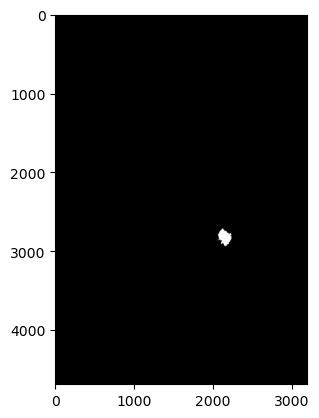

In [16]:
for file  in ROI_mask_images[0:10]:
    ROI_mask_images_show = PIL.Image.open(file)
    gray_img= ROI_mask_images_show.convert("L")
    plt.imshow(gray_img, cmap='gray')

In [17]:
calc_case_df = pd.read_csv("calc_case_description_train_set.csv")
calc_case_df.head()

patient_id  breast density left or right breast image view  abnormality id  \
0    P_00005               3                RIGHT         CC               1   
1    P_00005               3                RIGHT        MLO               1   
2    P_00007               4                 LEFT         CC               1   
3    P_00007               4                 LEFT        MLO               1   
4    P_00008               1                 LEFT         CC               1   

  abnormality type    calc type calc distribution  assessment  \
0    calcification    AMORPHOUS         CLUSTERED           3   
1    calcification    AMORPHOUS         CLUSTERED           3   
2    calcification  PLEOMORPHIC            LINEAR           4   
3    calcification  PLEOMORPHIC            LINEAR           4   
4    calcification          NaN          REGIONAL           2   

                 pathology  subtlety  \
0                MALIGNANT         3   
1                MALIGNANT         3   
2                   BENIGN         4   
3                   BENIGN         4   
4  BENIGN_WITHOUT_CALLBACK         3   

                                     image file path  \
0  Calc-Training_P_00005_RIGHT_CC/1.3.6.1.4.1.959...   
1  Calc-Training_P_00005_RIGHT_MLO/1.3.6.1.4.1.95...   
2  Calc-Training_P_00007_LEFT_CC/1.3.6.1.4.1.9590...   
3  Calc-Training_P_00007_LEFT_MLO/1.3.6.1.4.1.959...   
4  Calc-Training_P_00008_LEFT_CC/1.3.6.1.4.1.9590...   

                             cropped image file path  \
0  Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...   
1  Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....   
2  Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...   
3  Calc-Training_P_00007_LEFT_MLO_1/1.3.6.1.4.1.9...   
4  Calc-Training_P_00008_LEFT_CC_1/1.3.6.1.4.1.95...   

                                  ROI mask file path  
0  Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...  
1  Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....  
2  Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...  
3  Calc-Training_P_00007_LEFT_MLO_1/1.3.6.1.4.1.9...  
4  Calc-Training_P_00008_LEFT_CC_1/1.3.6.1.4.1.95...

In [18]:
mass_case_df = pd.read_csv("mass_case_description_train_set.csv")
mass_case_df.head()

patient_id  breast_density left or right breast image view  abnormality id  \
0    P_00001               3                 LEFT         CC               1   
1    P_00001               3                 LEFT        MLO               1   
2    P_00004               3                 LEFT         CC               1   
3    P_00004               3                 LEFT        MLO               1   
4    P_00004               3                RIGHT        MLO               1   

  abnormality type                          mass shape   mass margins  \
0             mass  IRREGULAR-ARCHITECTURAL_DISTORTION     SPICULATED   
1             mass  IRREGULAR-ARCHITECTURAL_DISTORTION     SPICULATED   
2             mass            ARCHITECTURAL_DISTORTION    ILL_DEFINED   
3             mass            ARCHITECTURAL_DISTORTION    ILL_DEFINED   
4             mass                                OVAL  CIRCUMSCRIBED   

   assessment  pathology  subtlety  \
0           4  MALIGNANT         4   
1           4  MALIGNANT         4   
2           4     BENIGN         3   
3           4     BENIGN         3   
4           4     BENIGN         5   

                                     image file path  \
0  Mass-Training_P_00001_LEFT_CC/1.3.6.1.4.1.9590...   
1  Mass-Training_P_00001_LEFT_MLO/1.3.6.1.4.1.959...   
2  Mass-Training_P_00004_LEFT_CC/1.3.6.1.4.1.9590...   
3  Mass-Training_P_00004_LEFT_MLO/1.3.6.1.4.1.959...   
4  Mass-Training_P_00004_RIGHT_MLO/1.3.6.1.4.1.95...   

                             cropped image file path  \
0  Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...   
1  Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...   
2  Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...   
3  Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...   
4  Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....   

                                  ROI mask file path  
0  Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...  
1  Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...  
2  Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...  
3  Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...  
4  Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....

In [19]:
dicom_cleaned_data = dicom_data.copy()
dicom_cleaned_data.head()

file_path  \
0  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.12930...   
1  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.24838...   
2  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.26721...   
3  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...   
4  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...   

                                          image_path  AccessionNumber  \
0  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.129308...              NaN   
1  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.248386...              NaN   
2  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.267213...              NaN   
3  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...              NaN   
4  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...              NaN   

   BitsAllocated  BitsStored BodyPartExamined  Columns  ContentDate  \
0             16          16           BREAST      351     20160426   
1             16          16           BREAST     3526     20160426   
2             16          16           BREAST     1546     20160503   
3             16          16           BREAST       97     20160503   
4              8           8      Left Breast     3104     20160503   

   ContentTime ConversionType  ...  \
0   131732.685            WSD  ...   
1   143829.101            WSD  ...   
2   111956.298            WSD  ...   
3   115347.770            WSD  ...   
4   115347.770            WSD  ...   

   SecondaryCaptureDeviceManufacturerModelName      SeriesDescription  \
0                                       MATLAB         cropped images   
1                                       MATLAB  full mammogram images   
2                                       MATLAB  full mammogram images   
3                                       MATLAB         cropped images   
4                                       MATLAB                    NaN   

                                   SeriesInstanceUID SeriesNumber  \
0  1.3.6.1.4.1.9590.100.1.2.129308726812851964007...            1   
1  1.3.6.1.4.1.9590.100.1.2.248386742010678582309...            1   
2  1.3.6.1.4.1.9590.100.1.2.267213171011171858918...            1   
3  1.3.6.1.4.1.9590.100.1.2.381187369611524586537...            1   
4  1.3.6.1.4.1.9590.100.1.2.381187369611524586537...            1   

  SmallestImagePixelValue  SpecificCharacterSet   StudyDate StudyID  \
0                   23078            ISO_IR 100  20160720.0    DDSM   
1                       0            ISO_IR 100  20160720.0    DDSM   
2                       0            ISO_IR 100  20160807.0    DDSM   
3                   32298            ISO_IR 100  20170829.0    DDSM   
4                       0            ISO_IR 100         NaN    DDSM   

                                    StudyInstanceUID  StudyTime  
0  1.3.6.1.4.1.9590.100.1.2.271867287611061855725...   214951.0  
1  1.3.6.1.4.1.9590.100.1.2.161516517311681906612...   193426.0  
2  1.3.6.1.4.1.9590.100.1.2.291043622711253836701...   161814.0  
3  1.3.6.1.4.1.9590.100.1.2.335006093711888937440...   180109.0  
4  1.3.6.1.4.1.9590.100.1.2.335006093711888937440...        NaN  

[5 rows x 38 columns]

In [20]:
dicom_cleaned_data.drop(['PatientBirthDate','AccessionNumber','Columns','ContentDate','ContentTime','PatientSex','PatientBirthDate',
                                                'ReferringPhysicianName','Rows','SOPClassUID','SOPInstanceUID',
                                                'StudyDate','StudyID','StudyInstanceUID','StudyTime','InstanceNumber','SeriesInstanceUID','SeriesNumber'],axis =1, inplace=True)

In [21]:
dicom_cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10237 entries, 0 to 10236
Data columns (total 21 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   file_path                                    10237 non-null  object
 1   image_path                                   10237 non-null  object
 2   BitsAllocated                                10237 non-null  int64 
 3   BitsStored                                   10237 non-null  int64 
 4   BodyPartExamined                             10237 non-null  object
 5   ConversionType                               10237 non-null  object
 6   HighBit                                      10237 non-null  int64 
 7   LargestImagePixelValue                       10237 non-null  int64 
 8   Laterality                                   9671 non-null   object
 9   Modality                                     10237 non-null  object
 10  PatientID 

In [22]:
dicom_cleaned_data.isnull().sum()

file_path                                        0
image_path                                       0
BitsAllocated                                    0
BitsStored                                       0
BodyPartExamined                                 0
ConversionType                                   0
HighBit                                          0
LargestImagePixelValue                           0
Laterality                                     566
Modality                                         0
PatientID                                        0
PatientName                                      0
PatientOrientation                               0
PhotometricInterpretation                        0
PixelRepresentation                              0
SamplesPerPixel                                  0
SecondaryCaptureDeviceManufacturer               0
SecondaryCaptureDeviceManufacturerModelName      0
SeriesDescription                              566
SmallestImagePixelValue        

In [23]:
dicom_cleaned_data['SeriesDescription'].fillna(method='bfill',axis=0, inplace=True) # is used with the fillna() function to fill missing values (NaN) in a DataFrame or Series.

In [24]:
dicom_cleaned_data['Laterality'].fillna(method='bfill',axis=0, inplace=True)

In [25]:
dicom_cleaned_data.isnull().sum()

file_path                                      0
image_path                                     0
BitsAllocated                                  0
BitsStored                                     0
BodyPartExamined                               0
ConversionType                                 0
HighBit                                        0
LargestImagePixelValue                         0
Laterality                                     0
Modality                                       0
PatientID                                      0
PatientName                                    0
PatientOrientation                             0
PhotometricInterpretation                      0
PixelRepresentation                            0
SamplesPerPixel                                0
SecondaryCaptureDeviceManufacturer             0
SecondaryCaptureDeviceManufacturerModelName    0
SeriesDescription                              0
SmallestImagePixelValue                        0
SpecificCharacterSet

In [26]:
calc_case_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1546 entries, 0 to 1545
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   patient_id               1546 non-null   object
 1   breast density           1546 non-null   int64 
 2   left or right breast     1546 non-null   object
 3   image view               1546 non-null   object
 4   abnormality id           1546 non-null   int64 
 5   abnormality type         1546 non-null   object
 6   calc type                1526 non-null   object
 7   calc distribution        1170 non-null   object
 8   assessment               1546 non-null   int64 
 9   pathology                1546 non-null   object
 10  subtlety                 1546 non-null   int64 
 11  image file path          1546 non-null   object
 12  cropped image file path  1546 non-null   object
 13  ROI mask file path       1546 non-null   object
dtypes: int64(4), object(10)
memory usage: 16

In [27]:
calc_case_df.head()

patient_id  breast density left or right breast image view  abnormality id  \
0    P_00005               3                RIGHT         CC               1   
1    P_00005               3                RIGHT        MLO               1   
2    P_00007               4                 LEFT         CC               1   
3    P_00007               4                 LEFT        MLO               1   
4    P_00008               1                 LEFT         CC               1   

  abnormality type    calc type calc distribution  assessment  \
0    calcification    AMORPHOUS         CLUSTERED           3   
1    calcification    AMORPHOUS         CLUSTERED           3   
2    calcification  PLEOMORPHIC            LINEAR           4   
3    calcification  PLEOMORPHIC            LINEAR           4   
4    calcification          NaN          REGIONAL           2   

                 pathology  subtlety  \
0                MALIGNANT         3   
1                MALIGNANT         3   
2                   BENIGN         4   
3                   BENIGN         4   
4  BENIGN_WITHOUT_CALLBACK         3   

                                     image file path  \
0  Calc-Training_P_00005_RIGHT_CC/1.3.6.1.4.1.959...   
1  Calc-Training_P_00005_RIGHT_MLO/1.3.6.1.4.1.95...   
2  Calc-Training_P_00007_LEFT_CC/1.3.6.1.4.1.9590...   
3  Calc-Training_P_00007_LEFT_MLO/1.3.6.1.4.1.959...   
4  Calc-Training_P_00008_LEFT_CC/1.3.6.1.4.1.9590...   

                             cropped image file path  \
0  Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...   
1  Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....   
2  Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...   
3  Calc-Training_P_00007_LEFT_MLO_1/1.3.6.1.4.1.9...   
4  Calc-Training_P_00008_LEFT_CC_1/1.3.6.1.4.1.95...   

                                  ROI mask file path  
0  Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...  
1  Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....  
2  Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...  
3  Calc-Training_P_00007_LEFT_MLO_1/1.3.6.1.4.1.9...  
4  Calc-Training_P_00008_LEFT_CC_1/1.3.6.1.4.1.95...

In [28]:
Data_cleaning_1 = calc_case_df.copy()
Data_cleaning_1 = Data_cleaning_1.rename(columns={'calc type':'calc_type'})
Data_cleaning_1 = Data_cleaning_1.rename(columns={'calc distribution':'calc_distribution'})
Data_cleaning_1 = Data_cleaning_1.rename(columns={'image view':'image_view'})
Data_cleaning_1 = Data_cleaning_1.rename(columns={'left or right breast':'left_or_right_breast'})
Data_cleaning_1 = Data_cleaning_1.rename(columns={'breast density':'breast_density'})
Data_cleaning_1 = Data_cleaning_1.rename(columns={'abnormality type':'abnormality_type'})
Data_cleaning_1['pathology'] = Data_cleaning_1['pathology'].astype('category')
Data_cleaning_1['calc_type'] = Data_cleaning_1['calc_type'].astype('category')
Data_cleaning_1['calc_distribution'] = Data_cleaning_1['calc_distribution'].astype('category')
Data_cleaning_1['abnormality_type'] = Data_cleaning_1['abnormality_type'].astype('category')
Data_cleaning_1['image_view'] = Data_cleaning_1['image_view'].astype('category')
Data_cleaning_1['left_or_right_breast'] = Data_cleaning_1['left_or_right_breast'].astype('category')
Data_cleaning_1.isna().sum()

patient_id                   0
breast_density               0
left_or_right_breast         0
image_view                   0
abnormality id               0
abnormality_type             0
calc_type                   20
calc_distribution          376
assessment                   0
pathology                    0
subtlety                     0
image file path              0
cropped image file path      0
ROI mask file path           0
dtype: int64

In [29]:
Data_cleaning_1['calc_type'].fillna(method = 'bfill', axis = 0, inplace=True) 
Data_cleaning_1['calc_distribution'].fillna(method = 'bfill', axis = 0, inplace=True)
Data_cleaning_1.isna().sum()

patient_id                 0
breast_density             0
left_or_right_breast       0
image_view                 0
abnormality id             0
abnormality_type           0
calc_type                  0
calc_distribution          0
assessment                 0
pathology                  0
subtlety                   0
image file path            0
cropped image file path    0
ROI mask file path         0
dtype: int64

In [30]:
Data_cleaning_2 = mass_case_df.copy()
Data_cleaning_2 = Data_cleaning_2.rename(columns={'mass shape':'mass_shape'})
Data_cleaning_2 = Data_cleaning_2.rename(columns={'left or right breast':'left_or_right_breast'})
Data_cleaning_2 = Data_cleaning_2.rename(columns={'mass margins':'mass_margins'})
Data_cleaning_2 = Data_cleaning_2.rename(columns={'image view':'image_view'})
Data_cleaning_2 = Data_cleaning_2.rename(columns={'abnormality type':'abnormality_type'})
Data_cleaning_2['left_or_right_breast'] = Data_cleaning_2['left_or_right_breast'].astype('category')
Data_cleaning_2['image_view'] = Data_cleaning_2['image_view'].astype('category')
Data_cleaning_2['mass_margins'] = Data_cleaning_2['mass_margins'].astype('category')
Data_cleaning_2['mass_shape'] = Data_cleaning_2['mass_shape'].astype('category')
Data_cleaning_2['abnormality_type'] = Data_cleaning_2['abnormality_type'].astype('category')
Data_cleaning_2['pathology'] = Data_cleaning_2['pathology'].astype('category')
Data_cleaning_2.isna().sum()

patient_id                  0
breast_density              0
left_or_right_breast        0
image_view                  0
abnormality id              0
abnormality_type            0
mass_shape                  4
mass_margins               43
assessment                  0
pathology                   0
subtlety                    0
image file path             0
cropped image file path     0
ROI mask file path          0
dtype: int64

In [31]:
Data_cleaning_2['mass_shape'].fillna(method = 'bfill', axis = 0, inplace=True) 
Data_cleaning_2['mass_margins'].fillna(method = 'bfill', axis = 0, inplace=True) 
Data_cleaning_2.isna().sum()

patient_id                 0
breast_density             0
left_or_right_breast       0
image_view                 0
abnormality id             0
abnormality_type           0
mass_shape                 0
mass_margins               0
assessment                 0
pathology                  0
subtlety                   0
image file path            0
cropped image file path    0
ROI mask file path         0
dtype: int64

In [32]:
breast_imgs = '/Users/saee2510/Downloads/breast-histopathology'

In [33]:
# path = '/kaggle/input/breast-histopathology-images/IDC_regular_ps50_idx5/'
print(os.path.exists(breast_imgs))

True


In [34]:
import glob

# Define the path to your directory
breast_imgs_path = '/Users/saee2510/Downloads/breast-histopathology/**/*.png'

# Use glob to find all PNG files recursively in the directory
breast_imgs = glob.glob(breast_imgs_path, recursive=True)

# Print the number of images found and some sample paths
print(f"Number of images found: {len(breast_imgs)}")
print("Sample images:", breast_imgs[:5])  # Print the first 5 paths as a sample


Number of images found: 555048
Sample images: ['/Users/saee2510/Downloads/breast-histopathology/9036/0/9036_idx5_x1051_y2401_class0.png', '/Users/saee2510/Downloads/breast-histopathology/9036/0/9036_idx5_x2951_y951_class0.png', '/Users/saee2510/Downloads/breast-histopathology/9036/0/9036_idx5_x3001_y1451_class0.png', '/Users/saee2510/Downloads/breast-histopathology/9036/0/9036_idx5_x3051_y801_class0.png', '/Users/saee2510/Downloads/breast-histopathology/9036/0/9036_idx5_x951_y1901_class0.png']


In [35]:
for imgname in breast_imgs[:5]:
    print(imgname)

/Users/saee2510/Downloads/breast-histopathology/9036/0/9036_idx5_x1051_y2401_class0.png
/Users/saee2510/Downloads/breast-histopathology/9036/0/9036_idx5_x2951_y951_class0.png
/Users/saee2510/Downloads/breast-histopathology/9036/0/9036_idx5_x3001_y1451_class0.png
/Users/saee2510/Downloads/breast-histopathology/9036/0/9036_idx5_x3051_y801_class0.png
/Users/saee2510/Downloads/breast-histopathology/9036/0/9036_idx5_x951_y1901_class0.png


In [36]:
non_cancer_imgs = []
cancer_imgs = []

for img in breast_imgs:
    # Split the image path into parts
    path_parts = img.split('/')
    
    # Check the directory part at index 6
    if len(path_parts) > 6:  # Ensure there are enough parts in the path
        directory = path_parts[6]  # Access the directory part (which is '0' or '1')
        
        if directory == '0':
            non_cancer_imgs.append(img)
        elif directory == '1':
            cancer_imgs.append(img)

# Optional: print the results
print(f"Non-cancer images: {len(non_cancer_imgs)}")
print(f"Cancer images: {len(cancer_imgs)}")


Non-cancer images: 198738
Cancer images: 78786


In [45]:
non_cancer_imgs

['/Users/saee2510/Downloads/breast-histopathology/9036/0/9036_idx5_x1051_y2401_class0.png',
 '/Users/saee2510/Downloads/breast-histopathology/9036/0/9036_idx5_x2951_y951_class0.png',
 '/Users/saee2510/Downloads/breast-histopathology/9036/0/9036_idx5_x3001_y1451_class0.png',
 '/Users/saee2510/Downloads/breast-histopathology/9036/0/9036_idx5_x3051_y801_class0.png',
 '/Users/saee2510/Downloads/breast-histopathology/9036/0/9036_idx5_x951_y1901_class0.png',
 '/Users/saee2510/Downloads/breast-histopathology/9036/0/9036_idx5_x2251_y751_class0.png',
 '/Users/saee2510/Downloads/breast-histopathology/9036/0/9036_idx5_x1901_y401_class0.png',
 '/Users/saee2510/Downloads/breast-histopathology/9036/0/9036_idx5_x3201_y1101_class0.png',
 '/Users/saee2510/Downloads/breast-histopathology/9036/0/9036_idx5_x3351_y1251_class0.png',
 '/Users/saee2510/Downloads/breast-histopathology/9036/0/9036_idx5_x2051_y2551_class0.png',
 '/Users/saee2510/Downloads/breast-histopathology/9036/0/9036_idx5_x1051_y2301_class0

In [37]:
data_insight_1 = pd.DataFrame({'state of cancer' : ['0','1'],'Numbers of Patients' : [198738,78786]})

In [38]:
bar = px.bar(data_frame=data_insight_1, x = 'state of cancer', y='Numbers of Patients', color='state of cancer')
bar.update_layout(title_text='Number of Patients with cancer (1) and patients with no cancer (0)', title_x=0.5)
bar.show()

In [39]:
r= pd.DataFrame(dicom_cleaned_data['SeriesDescription'].value_counts())
r= r.reset_index()
r= r.rename(columns={'SeriesDescription':'SeriesDescription_counts', 'index':'SeriesDescription'})
r

SeriesDescription_counts  count
0           cropped images   3859
1          ROI mask images   3340
2    full mammogram images   3038

In [40]:
ba_1 = px.bar(data_frame=dicom_cleaned_data, x='SeriesDescription', color='SeriesDescription',
              title='Types of images used')
ba_1.update_layout(title_text='Types of images used', title_x=0.5)
ba_1.show()

In [50]:
f= pd.DataFrame(dicom_cleaned_data['BodyPartExamined'].value_counts())
f= f.reset_index()
f= f.rename(columns={'BodyPartExamined':'BodyPartExamined_counts', 'index':'Breast part Examined'})
f

BodyPartExamined_counts  count
0                  BREAST   9671
1             Left Breast    318
2            Right Breast    248

In [51]:
ba = px.bar(data_frame=f, x="BodyPartExamined_counts", y="count", color="BodyPartExamined_counts")
ba.update_layout(title_text='Breast Parts Examined', title_x=0.5, yaxis=dict(type='log'))
ba.show()

In [41]:
data_insight_2 = pd.DataFrame({'abnormality':[Data_cleaning_1.abnormality_type[0],Data_cleaning_2.abnormality_type[0]],
                               'counts_of_abnormalties':[len(Data_cleaning_1),len(Data_cleaning_2)]})
data_insight_2

abnormality  counts_of_abnormalties
0  calcification                    1546
1           mass                    1318

In [42]:
bar_2 =px.bar(data_frame=data_insight_2, x = 'abnormality', y='counts_of_abnormalties', color = 'abnormality')
bar_2.update_layout(title_text='Types of abnormalites of cancer', title_x=0.5)
bar_2.show()

In [43]:
x = Data_cleaning_1.left_or_right_breast.value_counts().RIGHT
y = Data_cleaning_1.left_or_right_breast.value_counts().LEFT
print(x,y)

728 818


In [44]:
data_insight_3 = pd.DataFrame({'left_or_right_breast':['RIGHT','LEFT'] , 'Counts':[x,y]})
data_insight_3


left_or_right_breast  Counts
0                RIGHT     728
1                 LEFT     818

In [45]:
insight_3 = px.bar(data_insight_3, y= 'Counts', x='left_or_right_breast',color = 'left_or_right_breast')
insight_3.update_layout(title_text=' clacification cancer position of the breasts ', title_x=0.5)
insight_3.show()

For calcification cancer, most cases are usually in left breast.

In [46]:
z = pd.DataFrame(Data_cleaning_1['calc_type'].value_counts())
z = z.reset_index()
z = z.rename(columns={'calc_type':'calc_type_counts'})
z

calc_type_counts  count
0                                         PLEOMORPHIC    664
1                                           AMORPHOUS    139
2                                            PUNCTATE    106
3                                       LUCENT_CENTER     93
4                                            VASCULAR     82
5                               FINE_LINEAR_BRANCHING     77
6                                              COARSE     35
7                     ROUND_AND_REGULAR-LUCENT_CENTER     33
8                   PLEOMORPHIC-FINE_LINEAR_BRANCHING     28
9            ROUND_AND_REGULAR-LUCENT_CENTER-PUNCTATE     24
10                         ROUND_AND_REGULAR-EGGSHELL     23
11                               PUNCTATE-PLEOMORPHIC     21
12                                         DYSTROPHIC     20
13                                    LUCENT_CENTERED     19
14         ROUND_AND_REGULAR-LUCENT_CENTER-DYSTROPHIC     18
15                                  ROUND_AND_REGULAR     17
16                  ROUND_AND_REGULAR-LUCENT_CENTERED     14
17                              AMORPHOUS-PLEOMORPHIC     12
18                    LARGE_RODLIKE-ROUND_AND_REGULAR     11
19                                 PUNCTATE-AMORPHOUS     10
20             COARSE-ROUND_AND_REGULAR-LUCENT_CENTER     10
21                    VASCULAR-COARSE-LUCENT_CENTERED      8
22                             LUCENT_CENTER-PUNCTATE      8
23                      ROUND_AND_REGULAR-PLEOMORPHIC      7
24                                           EGGSHELL      7
25                     PUNCTATE-FINE_LINEAR_BRANCHING      6
26                                    VASCULAR-COARSE      6
27                         ROUND_AND_REGULAR-PUNCTATE      5
28                    SKIN-PUNCTATE-ROUND_AND_REGULAR      4
29                                      SKIN-PUNCTATE      4
30           COARSE-ROUND_AND_REGULAR-LUCENT_CENTERED      4
31                         PUNCTATE-ROUND_AND_REGULAR      4
32                                      LARGE_RODLIKE      4
33                        AMORPHOUS-ROUND_AND_REGULAR      3
34                             PUNCTATE-LUCENT_CENTER      3
35                                               SKIN      2
36  VASCULAR-COARSE-LUCENT_CENTER-ROUND_AND_REGULA...      2
37                                 COARSE-PLEOMORPHIC      2
38               ROUND_AND_REGULAR-PUNCTATE-AMORPHOUS      2
39                               COARSE-LUCENT_CENTER      2
40                                    MILK_OF_CALCIUM      2
41                           COARSE-ROUND_AND_REGULAR      2
42                      SKIN-COARSE-ROUND_AND_REGULAR      1
43                        ROUND_AND_REGULAR-AMORPHOUS      1
44                            PLEOMORPHIC-PLEOMORPHIC      1

Calcification cancer has 45 types, the majority of which are PLEOMORPHIC.

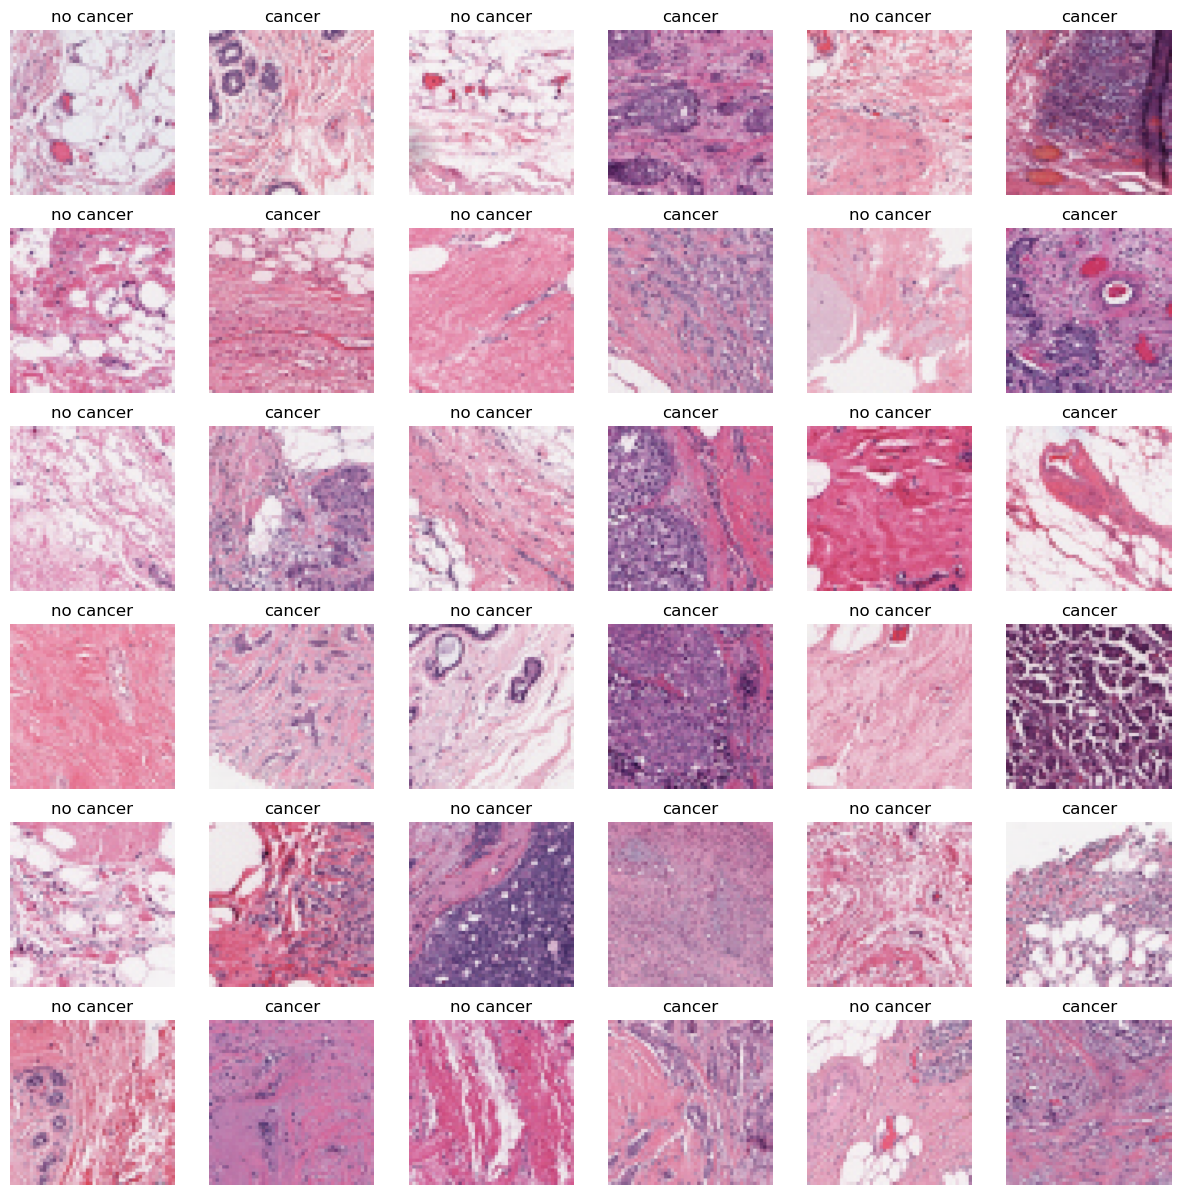

In [47]:
from keras.preprocessing.image import load_img, img_to_array

plt.figure(figsize = (15, 15))

some_non = np.random.randint(0, len(non_cancer_imgs), 18)
some_can = np.random.randint(0, len(cancer_imgs), 18)

s = 0
for num in some_non:
    
        img = load_img((non_cancer_imgs[num]), target_size=(100, 100))
        img = img_to_array(img)
        
        plt.subplot(6, 6, 2*s+1)
        plt.axis('off')
        plt.title('no cancer')
        plt.imshow(img.astype('uint8'))
        s += 1

s = 1
for num in some_can:
    
        img = load_img((cancer_imgs[num]), target_size=(100, 100))
        img = img_to_array(img)
        plt.subplot(6, 6, 2*s)
        plt.axis('off')        
        plt.title('cancer')
        plt.imshow(img.astype('uint8'))
        s += 1

In [50]:
import cv2
import numpy as np
import random

# Randomly sample images from 2 lists, 'non-cancer-img' and 'cancer-img'
some_non_img = random.sample(non_cancer_imgs, len(non_cancer_imgs))
some_can_img = random.sample(cancer_imgs, len(cancer_imgs))

# Initialize empty lists to store image data and labels
non_img_arr = []
can_img_arr = []

# Loop through each image in the 'some_non_img' list
for img in some_non_img:
    # Read the image in color mode
    n_img = cv2.imread(img, cv2.IMREAD_COLOR)
    # Resize the image to a fixed size (50x50 pixels) using linear interpolation
    n_img_size = cv2.resize(n_img, (50, 50), interpolation=cv2.INTER_LINEAR)
    # Append the resized image to the 'non_img_arr'
    non_img_arr.append(n_img_size)

# Loop through each image in the 'some_can_img' list
for img in some_can_img:
    # Read the image in color mode
    c_img = cv2.imread(img, cv2.IMREAD_COLOR)
    # Resize the image to a fixed size (50x50 pixels) using linear interpolation
    c_img_size = cv2.resize(c_img, (50, 50), interpolation=cv2.INTER_LINEAR)
    # Append the resized image to the 'can_img_arr'
    can_img_arr.append(c_img_size)

# Convert the lists of images into NumPy arrays
non_img_arr = np.array(non_img_arr)  # Shape: (N, 50, 50, 3)
can_img_arr = np.array(can_img_arr)  # Shape: (M, 50, 50, 3)

# Create labels for both arrays
non_labels = np.zeros((non_img_arr.shape[0],), dtype=int)  # Shape: (N,)
can_labels = np.ones((can_img_arr.shape[0],), dtype=int)   # Shape: (M,)

# Concatenate the image arrays and the label arrays
breast_img_arr = np.concatenate((non_img_arr, can_img_arr), axis=0)
labels = np.concatenate((non_labels, can_labels), axis=0)

# Shuffle the combined arrays randomly
indices = np.arange(breast_img_arr.shape[0])
np.random.shuffle(indices)

breast_img_arr = breast_img_arr[indices]
labels = labels[indices]

# Print the shapes
print("Shape of breast_img_arr:", breast_img_arr.shape)
print("Shape of labels:", labels.shape)


Shape of breast_img_arr: (277524, 50, 50, 3)
Shape of labels: (277524,)


In [51]:
from torch.utils.data import Dataset, DataLoader


In [52]:
import torch
class BreastCancerDataset(Dataset):
    def __init__(self,dataset,transform):
        self.dataset = dataset
        self.transform = transform
        
    def __len__(self):
        return (len(self.dataset))
    
    def __getitem__(self,idx):
        x,y = self.dataset[idx]
        
        if self.transform:
            x = transform(x)
       
        return x,torch.tensor(y)

In [53]:
from sklearn.model_selection import train_test_split

dataTrain, dataTest = train_test_split(breast_img_arr, test_size=0.2, random_state=42)

In [67]:
pip install torch torchvision


Note: you may need to restart the kernel to use updated packages.


In [68]:
pip show torch torchvision


Name: torch
Version: 2.4.1
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3
Location: /Users/saee2510/anaconda3/lib/python3.11/site-packages
Requires: filelock, fsspec, jinja2, networkx, sympy, typing-extensions
Required-by: timm, torchvision
---
Name: torchvision
Version: 0.19.1
Summary: image and video datasets and models for torch deep learning
Home-page: https://github.com/pytorch/vision
Author: PyTorch Core Team
Author-email: soumith@pytorch.org
License: BSD
Location: /Users/saee2510/anaconda3/lib/python3.11/site-packages
Requires: numpy, pillow, torch
Required-by: timm
Note: you may need to restart the kernel to use updated packages.


In [54]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import cv2

# Initialize the ImageDataGenerator with some basic transformations
datagen = ImageDataGenerator(
    rescale=1./255,          # Normalize pixel values to [0, 1]
    rotation_range=20,       # Random rotation
    width_shift_range=0.2,   # Random horizontal shift
    height_shift_range=0.2,  # Random vertical shift
    shear_range=0.2,         # Shear transformation
    zoom_range=0.2,          # Random zoom
    horizontal_flip=True     # Random horizontal flip
)

# Custom function to load and transform images
def load_and_transform_images(image_paths, datagen):
    transformed_images = []
    
    for img_path in image_paths:
        # Load image using OpenCV
        img = cv2.imread(img_path)
        img = cv2.resize(img, (50, 50))  # Resize to fixed size (e.g., 50x50)
        img = np.expand_dims(img, axis=0)  # Add batch dimension (required for ImageDataGenerator)
        
        # Apply transformations
        img_transformed = datagen.random_transform(img[0])
        
        # Append the transformed image
        transformed_images.append(img_transformed)
    
    return np.array(transformed_images)

# Example usage: Assuming 'non_cancer_imgs' and 'cancer_imgs' are lists of image paths
non_cancer_imgs_transformed = load_and_transform_images(non_cancer_imgs, datagen)
cancer_imgs_transformed = load_and_transform_images(cancer_imgs, datagen)



In [55]:
pip install timm

Note: you may need to restart the kernel to use updated packages.


In [56]:
trainDataloader = DataLoader(dataTrain,batch_size=32,shuffle=True)
testDataloader = DataLoader(dataTest,batch_size=32,shuffle=True)

In [62]:
for batch in trainDataloader:
    img = batch[0]
    label = batch[1]
    metadata = batch[2]  # Add more if needed
    print(img.shape)
    print(label.shape)
    print(metadata)
    break


torch.Size([50, 50, 3])
torch.Size([50, 50, 3])
tensor([[[226, 231, 232],
         [226, 228, 231],
         [227, 228, 232],
         ...,
         [225, 229, 225],
         [224, 227, 236],
         [227, 227, 231]],

        [[226, 230, 232],
         [226, 228, 231],
         [226, 228, 232],
         ...,
         [225, 229, 227],
         [223, 226, 234],
         [226, 227, 231]],

        [[226, 229, 232],
         [225, 228, 232],
         [224, 227, 231],
         ...,
         [224, 229, 232],
         [222, 225, 231],
         [226, 227, 231]],

        ...,

        [[203, 207, 211],
         [202, 206, 209],
         [202, 206, 209],
         ...,
         [203, 208, 212],
         [206, 210, 214],
         [207, 211, 215]],

        [[202, 206, 210],
         [201, 206, 209],
         [201, 206, 209],
         ...,
         [202, 207, 211],
         [205, 207, 212],
         [205, 208, 213]],

        [[202, 206, 210],
         [201, 206, 209],
         [201, 206, 209],


In [63]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [64]:
import timm

model = timm.create_model("repvgg_a0",pretrained=True,num_classes=2)
model = model.to(device)

In [65]:
from tqdm import tqdm

In [66]:
def train_step(model: torch.nn.Module, 
               dataloader: torch.utils.data.DataLoader, 
               loss_fn: torch.nn.Module, 
               optimizer: torch.optim.Optimizer):
    model.train()
    
    train_loss, train_acc = 0, 0
    
    for img, label in dataloader:
        img, label = img.to(device), label.to(device)

        pred = model(img)

        loss = loss_fn(pred.squeeze(1), label)
        train_loss += loss.item() 

        optimizer.zero_grad()

        loss.backward()

        optimizer.step()

        pred_class = torch.argmax(torch.softmax(pred, dim=1), dim=1)
        train_acc += (pred_class == label).sum().item()/len(pred)

    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc

In [67]:
from sklearn.metrics import precision_score, recall_score, f1_score

def test_step(model: torch.nn.Module, 
              dataloader: torch.utils.data.DataLoader, 
              loss_fn: torch.nn.Module):
    model.eval() 
    
    test_loss, test_acc, test_precision, test_recall, test_f1 = 0, 0, 0, 0, 0
    
    all_preds, all_labels = [], []
    
    with torch.inference_mode():
        for img, label in dataloader:
            img, label = img.to(device), label.to(device)
    
            pred = model(img)

            loss = loss_fn(pred.squeeze(1), label)
            test_loss += loss.item()
            
            pred_labels = pred.argmax(dim=1)
            test_acc += ((pred_labels == label).sum().item()/len(pred_labels))
            
            all_preds.extend(pred_labels.cpu().detach().numpy())
            all_labels.extend(label.cpu().detach().numpy())
            
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    test_precision = precision_score(all_labels, all_preds)
    test_recall = recall_score(all_labels, all_preds)
    test_f1 = f1_score(all_labels, all_preds)
    return test_loss, test_acc, test_precision, test_recall, test_f1

In [68]:
import torch.nn as nn

def train(model: torch.nn.Module, 
          train_dataloader: torch.utils.data.DataLoader, 
          test_dataloader: torch.utils.data.DataLoader, 
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5):
    
    results = {"train_loss": [],
        "train_acc": [],
        "test_loss": [],
        "test_acc": []
    }
    
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer)
        
        test_loss, test_acc, test_precision, test_recall, test_f1 = test_step(model=model,
            dataloader=test_dataloader,
            loss_fn=loss_fn)
        
        print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f} | "
            f"test_precision: {test_precision:.4f} | "
            f"test_recall: {test_recall:.4f} | "  
            f"test_f1: {test_f1:.4f}"
        )

        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)

    return results

In [73]:
def train(model, train_dataloader, test_dataloader, optimizer, loss_fn, epochs):
    for epoch in range(epochs):
        for img, label in train_dataloader:  # Expecting only img and label
            img, label = img.to(device), label.to(device)
            torch.manual_seed(42) 
            torch.cuda.manual_seed(42)

            NUM_EPOCHS = 5

            loss_fn = nn.CrossEntropyLoss()
            optimizer = torch.optim.Adam(params=model.parameters(), lr=0.001)

            model_results = train(model=model, 
                        train_dataloader=trainDataloader,
                        test_dataloader=testDataloader,
                        optimizer=optimizer,
                        loss_fn=loss_fn, 
                        epochs=NUM_EPOCHS)


In [71]:
for batch in trainDataloader:
    print(len(batch))  # This will show the number of items in each batch
    break


32


In [74]:
import timm

model = timm.create_model("ghostnet_100",pretrained=True,num_classes=2)
model = model.to(device)

In [76]:
def train(model, train_dataloader, test_dataloader, optimizer, loss_fn, epochs):
    for epoch in range(epochs):
        model.train()  # Set the model to training mode
        
        total_loss = 0
        total_correct = 0
        total_samples = 0

        for batch in train_dataloader:
            img = batch[0].to(device)  # Assuming first item is images
            label = batch[1].to(device)  # Assuming second item is labels
            
            # Forward pass
            pred = model(img)
            loss = loss_fn(pred, label)
            total_loss += loss.item()  # Accumulate loss

            optimizer.zero_grad()  # Zero the gradients
            loss.backward()  # Backpropagation
            optimizer.step()  # Update weights
            
            # Calculate accuracy
            pred_class = torch.argmax(pred, dim=1)
            total_correct += (pred_class == label).sum().item()
            total_samples += label.size(0)  # Count samples

        # Calculate average loss and accuracy for the epoch
        avg_loss = total_loss / len(train_dataloader)
        accuracy = total_correct / total_samples
        
        print(f"Epoch [{epoch + 1}/{epochs}], Loss: {avg_loss:.4f}, Accuracy: {accuracy:.4f}")

    # Optionally, evaluate on test set here if needed


In [78]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import torchvision.transforms as transforms
from torchvision import datasets
import numpy as np

# Set the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define a simple CNN model
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = nn.functional.relu(self.conv1(x))
        x = nn.functional.max_pool2d(x, 2)
        x = nn.functional.relu(self.conv2(x))
        x = nn.functional.max_pool2d(x, 2)
        x = x.view(-1, 64 * 7 * 7)
        x = nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Load and preprocess dataset (using MNIST for this example)
transform = transforms.Compose([
    transforms.Resize((28, 28)),
    transforms.ToTensor(),
])

# Load the datasets
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

# Create DataLoader
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Initialize the model, loss function, and optimizer
model = SimpleCNN().to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training function
def train(model, train_dataloader, test_dataloader, optimizer, loss_fn, epochs):
    for epoch in range(epochs):
        print(f"Starting epoch {epoch + 1}/{epochs}")
        model.train()
        
        total_loss = 0
        total_correct = 0
        total_samples = 0

        for batch in train_dataloader:
            img, label = batch[0].to(device), batch[1].to(device)

            # Forward pass
            pred = model(img)
            loss = loss_fn(pred, label)
            total_loss += loss.item()

            optimizer.zero_grad()  # Zero the gradients
            loss.backward()  # Backpropagation
            optimizer.step()  # Update weights

            # Calculate accuracy
            pred_class = torch.argmax(pred, dim=1)
            total_correct += (pred_class == label).sum().item()
            total_samples += label.size(0)  # Count samples

        # Calculate average loss and accuracy for the epoch
        avg_loss = total_loss / len(train_dataloader)
        accuracy = total_correct / total_samples
        
        print(f"Epoch [{epoch + 1}/{epochs}], Loss: {avg_loss:.4f}, Accuracy: {accuracy:.4f}")

        # Evaluate on test data
        evaluate(model, test_dataloader, loss_fn)

# Evaluation function
def evaluate(model, test_dataloader, loss_fn):
    model.eval()  # Set to evaluation mode
    total_loss = 0
    total_correct = 0
    total_samples = 0

    with torch.no_grad():
        for batch in test_dataloader:
            img, label = batch[0].to(device), batch[1].to(device)

            pred = model(img)
            loss = loss_fn(pred, label)
            total_loss += loss.item()

            pred_class = torch.argmax(pred, dim=1)
            total_correct += (pred_class == label).sum().item()
            total_samples += label.size(0)

    avg_loss = total_loss / len(test_dataloader)
    accuracy = total_correct / total_samples
    print(f"Test Loss: {avg_loss:.4f}, Test Accuracy: {accuracy:.4f}")

# Set random seed for reproducibility
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 5

# Train the model
train(model=model, 
      train_dataloader=train_dataloader,
      test_dataloader=test_dataloader,
      optimizer=optimizer,
      loss_fn=loss_fn, 
      epochs=NUM_EPOCHS)


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|███████████████████████████| 9912422/9912422 [00:00<00:00, 20143270.95it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|█████████████████████████████████| 28881/28881 [00:00<00:00, 724539.11it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|████████████████████████████| 1648877/1648877 [00:00<00:00, 7291198.55it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|███████████████████████████████████| 4542/4542 [00:00<00:00, 848991.88it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



Starting epoch 1/5
Epoch [1/5], Loss: 0.1459, Accuracy: 0.9553
Test Loss: 0.0674, Test Accuracy: 0.9795
Starting epoch 2/5
Epoch [2/5], Loss: 0.0450, Accuracy: 0.9859
Test Loss: 0.0371, Test Accuracy: 0.9873
Starting epoch 3/5
Epoch [3/5], Loss: 0.0312, Accuracy: 0.9902
Test Loss: 0.0305, Test Accuracy: 0.9902
Starting epoch 4/5
Epoch [4/5], Loss: 0.0229, Accuracy: 0.9929
Test Loss: 0.0288, Test Accuracy: 0.9910
Starting epoch 5/5
Epoch [5/5], Loss: 0.0159, Accuracy: 0.9947
Test Loss: 0.0330, Test Accuracy: 0.9890
